In [164]:
!git clone https://github.com/zhouhaoyi/Informer2020.git
!git clone https://github.com/MichSteczko/informer_model_dla_cen_eth.git

fatal: destination path 'Informer2020' already exists and is not an empty directory.
fatal: destination path 'informer_model_dla_cen_eth' already exists and is not an empty directory.


In [490]:
!jt 

In [370]:
import os
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
data_path = os.path.join("informer_model_dla_cen_eth", "dane")
eth_dataframe_path_with_unix_timestamps = os.path.join(data_path, "BTC-USD.csv")
ethereum_dataframe = pd.read_csv(eth_dataframe_path_with_unix_timestamps, index_col = False)#.drop("Unnamed: 0", axis = 1)

In [371]:
ethereum_dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-17,417.889008,420.997009,417.889008,420.621002,420.621002,83528600
1,2016-03-18,420.546997,420.546997,406.136993,409.548004,409.548004,104940000
2,2016-03-19,409.265015,410.984009,407.230011,410.444000,410.444000,58423000
3,2016-03-20,410.401001,414.625000,410.401001,413.755005,413.755005,45947900
4,2016-03-21,413.417999,413.417999,410.381012,413.307007,413.307007,61655400
...,...,...,...,...,...,...,...
2493,2023-01-13,18868.906250,19964.322266,18753.164063,19909.574219,19909.574219,29225029694
2494,2023-01-14,19910.537109,21075.142578,19907.828125,20976.298828,20976.298828,38967784639
2495,2023-01-15,20977.484375,20993.748047,20606.986328,20880.798828,20880.798828,19298407543
2496,2023-01-16,20882.224609,21360.875000,20715.746094,21169.632813,21169.632813,26792494050


In [372]:
def dej_mu(x, y):
    if x < y:
        return x/y
    return -y/x

In [376]:
ethereum_dataframe["stopa"] = ethereum_dataframe[["Open", "Close"]].apply(lambda x: dej_mu(x.Open, x.Close))

AttributeError: 'Series' object has no attribute 'Open'

In [337]:
from sklearn import preprocessing
import numpy as np
x = ethereum_dataframe.Price #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit(np.array(x).reshape(-1, 1)).transform(np.array(x).reshape(-1, 1))
ethereum_dataframe["Price"] = x_scaled

In [338]:
# zamiana daty na normalny format z formatu UNIX
ethereum_dataframe["Timestamp"] = [datetime.fromtimestamp(int(timestamp/1000.0)) for timestamp in ethereum_dataframe["Timestamp"]]

In [339]:
ethereum_dataframe.columns = ["date", *ethereum_dataframe.columns[1:]]
ethereum_dataframe.head()

,date,Price
0,2017-01-01 01:00:00,-0.842934
1,2017-01-02 01:00:00,-0.842684
2,2017-01-03 01:00:00,-0.841616
3,2017-01-04 01:00:00,-0.840480
4,2017-01-05 01:00:00,-0.841203


In [14]:
ethereum_dataframe.plot('Date', 'Open', title = "Wykres cen w USD dla BTC w latach 2017 - 2022")

KeyError: 'Date'

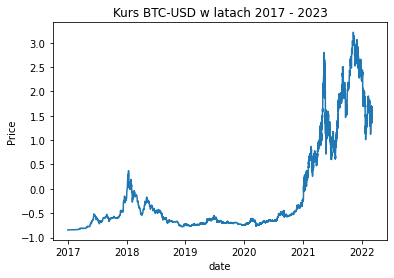

In [172]:
#ethereum_dataframe = ethereum_dataframe.loc[ethereum_dataframe.date > "2017"]
df = ethereum_dataframe
#df["Date"] = df["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").year)
sns.lineplot(
    x='date',
    y='Price',
    data= ethereum_dataframe,
    ).set(title = "Kurs BTC-USD w latach 2017 - 2023")
plt.show()

      date         Open         High          Low        Close    Adj Close  \
0     2018   755.757019   782.530029   742.004028   772.640991   772.640991   
1     2018   772.346008   914.830017   772.346008   884.443970   884.443970   
2     2018   886.000000   974.471008   868.450989   962.719971   962.719971   
3     2018   961.713013  1045.079956   946.085999   980.921997   980.921997   
4     2018   975.750000  1075.390015   956.325012   997.719971   997.719971   
...    ...          ...          ...          ...          ...          ...   
1842  2023  1577.107422  1594.000977  1553.335938  1567.846069  1567.846069   
1843  2023  1567.698975  1602.106689  1509.422852  1515.506958  1515.506958   
1844  2023  1515.249634  1557.970337  1514.380005  1552.556519  1552.556519   
1845  2023          NaN          NaN          NaN          NaN          NaN   
1846  2023  1657.135498  1661.975098  1647.460083  1653.896484  1653.896484   

            Volume  
0     2.595760e+09  
1     5.7

In [340]:
ethereum_dataframe.loc[::-1].to_csv(ethereum_prices_data_path_with_standard_timestamps, index = False)
ethereum_dataframe.head()

,date,Price
0,2017-01-01 01:00:00,-0.842934
1,2017-01-02 01:00:00,-0.842684
2,2017-01-03 01:00:00,-0.841616
3,2017-01-04 01:00:00,-0.840480
4,2017-01-05 01:00:00,-0.841203


In [23]:
eth_dataframe_path_with_unix_timestamps = os.path.join( "ethereum_prices_data_path_with_standard_timestamps.csv")
elko = pd.read_csv(ethereum_prices_data_path_with_standard_timestamps, index_col = False)

crypto_data = ethereum_dataframe

# Candlestick
fig = go.Figure(
        data = [
            go.Candlestick(
                x = crypto_data.date,
                open = crypto_data.Open,
                high = crypto_data.High,
                low = crypto_data.Low,
                close = crypto_data.Close
            ),
            
            go.Scatter(
                x = crypto_data.date, 
                y = crypto_data.Close.rolling(window=50).mean(),
                mode = 'lines', 
                name = '50SMA',
                line = {'color': '#1900ff'}
            )
        ]
)
fig.update_layout(
    title = f'Kurs ETH-USD w latach 2018 - 2023',
    xaxis_title = 'Date',
    yaxis_title = f'Price USD',
    xaxis_rangeslider_visible = False
)
fig.update_yaxes(tickprefix='$')

fig.show()

AttributeError: 'DataFrame' object has no attribute 'Open'

In [341]:
import sys
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch
from data.data_loader import Dataset_Custom
from torch.utils.data import DataLoader
import pandas as pd
import os
#elko.columns = ["data", "cena_otwarcia", "najwyzsza_cena", "najnizsza_cena", "cena_zamkniecia", "skorygowana_cena_zamkniecia", "ilosc_w_obiegu", "stopa_zwrotu", ]
#elko = elko.drop("skorygowana_cena_zamkniecia", axis=1)
#elko.head()

In [348]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'custom' # data
args.root_path = data_path
args.data_path = 'ethereum_prices_with_standard_timestamps.csv'
args.features = 'MS' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'Price' # target feature in S or MS task
args.freq = 'd' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = 'informer_model_dla_cen_eth/informer_checkpoints' # location of model checkpoints

args.seq_len = 366   # input sequence length of Informer encoder
args.label_len = 200 # start token length of Informer decoder
args.pred_len = 40 # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 1 # encoder input size
args.dec_in = 1 # decoder input size
args.c_out = 10 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 16 # num of heads
args.e_layers = 4 # num of encoder layers
args.d_layers = 2 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.08 # dropout
args.attn = 'full' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.detail_freq = 'd'

args.batch_size = 32 
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 12
args.patience = 2
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0
args.inverse = True
args.use_multi_gpu = False
args.devices = '0,1,2,3'

In [349]:
Data = Dataset_Custom
timeenc = 0 if args.embed!='timeF' else 1
flag = 'test'; shuffle_flag = False; drop_last = True; batch_size = 1

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    timeenc=timeenc,
    target=args.target, 
    freq=args.freq 
    
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [350]:
batch_x,batch_y,batch_x_mark,batch_y_mark = data_set[0]

In [351]:
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ','')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]

In [352]:
args.freq = args.freq[-1:]

In [353]:


Exp = Exp_Informer


In [354]:

for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()
    

Use GPU: cuda:0
>>>>>>>start training : informer_custom_ftMS_sl366_ll200_pl40_dm512_nh16_el4_dl2_df2048_atfull_fc5_ebtimeF_dtTrue_mxTrue_exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 16887
val 2432
test 4901
	iters: 100, epoch: 1 | loss: 0.0459993
	speed: 0.2990s/iter; left time: 1861.0303s
	iters: 200, epoch: 1 | loss: 0.0470950
	speed: 0.3057s/iter; left time: 1872.4784s
	iters: 300, epoch: 1 | loss: 0.0175260
	speed: 0.2878s/iter; left time: 1733.8090s
	iters: 400, epoch: 1 | loss: 0.0183848
	speed: 0.2633s/iter; left time: 1560.0544s
	iters: 500, epoch: 1 | loss: 0.0235930
	speed: 0.2711s/iter; left time: 1579.1205s
Epoch: 1 cost time: 149.97340440750122
Epoch: 1, Steps: 527 | Train Loss: 0.0344087 Vali Loss: 0.0023018 Test Loss: 0.0072365
Validation loss decreased (inf --> 0.002302).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.0134041
	speed: 0.5451s/iter; left time: 3106.1107s
	iters: 200, epoch: 2 | loss: 0.0089978
	speed: 0.2664s/iter; left time: 

In [355]:
prediction = exp.predict(setting, True)

pred 1


In [356]:
mse, mae, rmse, mape, mspe = np.load('./results/'+setting+'/metrics.npy')

In [357]:
print('mse:{}, mae:{}, rmse:{}, mape:{}, mspe:{}'.format(mse, mae, rmse, mape, mspe))

mse:0.05656113475561142, mae:0.007236488163471222, rmse:0.08506754785776138, mape:0.24083925783634186, mspe:17.85411834716797


In [358]:
metrics = np.load('./results/'+setting+'/metrics.npy')

In [359]:
metrics_df = pd.DataFrame()
metrics_df["metryka"] = ["mse", "mae", "rmse", "mape", "mspe"]
metrics_df["wartosc"] = metrics
metrics_df.head()

,metryka,wartosc
0,mse,0.056561
1,mae,0.007236
2,rmse,0.085068
3,mape,0.240839
4,mspe,17.854118


<AxesSubplot:xlabel='metryka', ylabel='wartosc'>

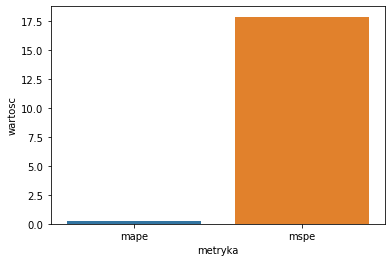

In [360]:
sns.barplot(data = metrics_df.iloc[3:], x="metryka", y="wartosc")

In [361]:
preds = np.load('./results/'+setting+'/pred.npy')
trues = np.load('./results/'+setting+'/true.npy')


In [362]:
prediction = np.load("./results/"+setting+"/real_prediction.npy")

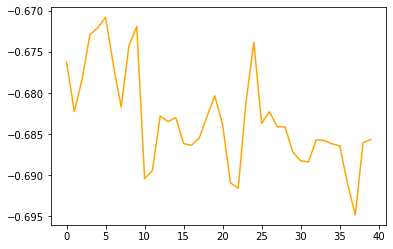

In [363]:
plt.figure()
plt.plot(preds[0,:,-1], color="orange")

plt.show()

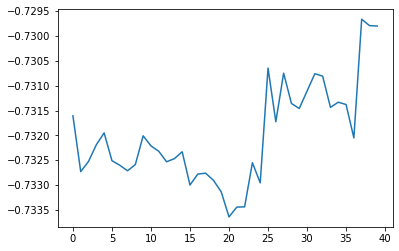

In [364]:
plt.figure()
plt.plot(trues[0,:,-1])

plt.show()

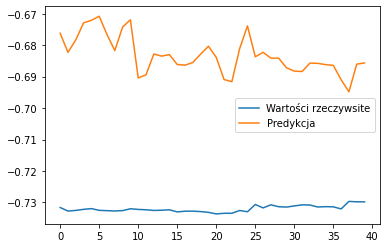

In [365]:
plt.figure()
plt.plot(trues[0,:,-1], label='Wartości rzeczywsite')
plt.plot(preds[0,:,-1], label='Predykcja')
plt.legend()
#plt.ylim([1.6, 2.2])
plt.show()

In [366]:
len(preds[0,:,-1])

40